# * Python Implementation

In [66]:
# Import necessary liabries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# get the csv data here and print head

In [5]:
df=pd.read_csv("breast cancer.csv",index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# label = diagnosis
# print summary

In [6]:
print('shape-------->',df.shape)
print('each column and data type and its count','\n')
print(df.info())

shape--------> (569, 32)
each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perime

# info () me float64 aaya to maximun time this is continues data
# info () object aaya to categorical data
# drop alert 1 : unnamed:32 column all nuiis sefe to remove the column

In [7]:
df=df.drop(['Unnamed: 32'],axis=1)

# Dataframe statistics

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# ^ imbalance dataset
# ^ * dataset is not imbalance we are good to proceed

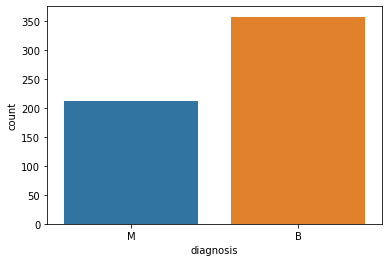

In [11]:
sns.countplot(x='diagnosis',data=df)
plt.show()

In [12]:
df.shape

(569, 31)

# * Using selectKbest feature selection method
# selectkbest use f_classif function to find best feature,where f_classif user anova test¶

In [15]:
from sklearn.feature_selection import SelectKBest ,f_classif

In [67]:
# replace label column (diagnosis ) into liabiray codes

In [16]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

In [17]:
x=df.drop('diagnosis',axis=1)
y=df.diagnosis

In [19]:
best_feature= SelectKBest (score_func=f_classif,k=17)
fit=best_feature.fit(x,y)
df_score=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)


feature_score=pd.concat([df_columns,df_score],axis=1)
feature_score.columns=['feature_name','score']

print(feature_score.nlargest(17,'score'))

            feature_name       score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880


# * Model Building

In [21]:
new_x=df[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','area_se','texture_worst','smoothness_worst']]

In [22]:
new_x

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
id,,,,,,,,,,,,,,,,,
842302,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220
842517,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398,74.08,23.41,0.12380
84300903,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585,94.03,25.53,0.14440
84348301,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445,27.23,26.50,0.20980
84358402,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438,94.44,16.67,0.13740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673,158.70,26.40,0.14100
926682,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203,99.04,38.25,0.11660
926954,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425,48.55,34.12,0.11390


In [23]:
scalar=StandardScaler()
x_sclaar=scalar.fit_transform(new_x)

In [68]:
# Buliding model to test unexeposed data

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_sclaar,y,test_size=0.25,random_state=355)

# Write one function and call as many astime to check accuracy_score of different models

In [28]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n===========train Result=============")
        print(f"accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        pred=clf.predict(x_test)
        
        print("\n=============test Result=============")
        print(f"accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n \n test classification report \n",classification_report(y_test,pred,digits=2))

# Infitiate KNeighorsclassifier

In [29]:
knn=KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

# Call the function and pass datset to check train and test score

In [30]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)

metric_score(knn,x_train,x_test,y_train,y_test,train=False)


===========train Result=============
accuracy score:98.83%

=============test Result=============
accuracy score:95.80%

 
 test classification report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



# ** Cross - Validation

# Kfold method (for demo purpose only).you didn't to practice this

In [32]:
from sklearn.model_selection import KFold,cross_val_score

k_k =KFold(n_splits=3)
k_k

KFold(n_splits=3, random_state=None, shuffle=False)

In [34]:
for train,test in k_k.split([1,2,3,4,5,6,7,8,9,10]):
    print('train:',train,'test:',test)

train: [4 5 6 7 8 9] test: [0 1 2 3]
train: [0 1 2 3 7 8 9] test: [4 5 6]
train: [0 1 2 3 4 5 6] test: [7 8 9]


# * cross validation score to check if the model is overfitting

In [36]:
cross_val_score(knn, x_sclaar,y,cv=5)

array([0.96491228, 0.96491228, 0.97368421, 0.98245614, 0.96460177])

0.9701133364384411

# ** Hyperparameter Tuning

# let's use Gridsearchcv for the best parameter to improve the accuracy

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid= {'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]
            }

In [40]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [41]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [42]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

# we will use the best parameters in our K-NN algorithm and check if accuracy is increasing

In [44]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=3)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

# call the function and pass datset to check train and test score

In [45]:
metric_score(knn, x_train,x_test,y_train,y_test,train=True)
# this is for training score
metric_score(knn,x_train,x_test,y_train,y_test,train=False)
# this is for testing score


===========train Result=============
accuracy score:98.36%

=============test Result=============
accuracy score:95.80%

 
 test classification report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



# * if you want to check the confusion_matrix you can check
# * we are predicting once again beacuse variabe inside the function are local variabe

In [46]:
y_pred=knn.predict(x_test)
cfm=confusion_matrix (y_test,y_pred)

In [47]:
cfm

array([[91,  2],
       [ 4, 46]], dtype=int64)

# *  Imputer - Encoder

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
import pandas as pd

df=pd.DataFrame({'salary':[25000,48000,71000,85000,90000,55000],
                'city':['Bengaluru','Delhi','Hyderabad','Bengaluru','Hyderabad','Bengaluru'],
                'Gender':['male','female','female','female','male','male'],
                'Exp':[1,3,5,6,9,None]})
df

,salary,city,Gender,Exp
0,25000,Bengaluru,male,1.0
1,48000,Delhi,female,3.0
2,71000,Hyderabad,female,5.0
3,85000,Bengaluru,female,6.0
4,90000,Hyderabad,male,9.0
5,55000,Bengaluru,male,NaN


# * Encoder and Imputers

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
Lab_enc=LabelEncoder()

In [54]:
df2=Lab_enc.fit_transform(df['city'])
pd.Series(df2)

0    0
1    1
2    2
3    0
4    2
5    0
dtype: int32

In [55]:
df['city']=df2
df

,salary,city,Gender,Exp
0,25000,0,male,1.0
1,48000,1,female,3.0
2,71000,2,female,5.0
3,85000,0,female,6.0
4,90000,2,male,9.0
5,55000,0,male,NaN


In [58]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer

In [59]:
ohe=OneHotEncoder()
si=SimpleImputer()

In [60]:
import pandas as pd

df=pd.DataFrame({'salary':[25000,48000,71000,85000,90000,55000],
                'city':['Bengaluru','Delhi','Hyderabad','Bengaluru','Hyderabad','Bengaluru'],
                'Gender':['male','female','female','female','male','male'],
                'Exp':[1,3,5,6,9,None]})
df

,salary,city,Gender,Exp
0,25000,Bengaluru,male,1.0
1,48000,Delhi,female,3.0
2,71000,Hyderabad,female,5.0
3,85000,Bengaluru,female,6.0
4,90000,Hyderabad,male,9.0
5,55000,Bengaluru,male,NaN


In [61]:
ct = make_column_transformer(
     (ohe,['city','Gender']),
     (si,['Exp']),
     remainder='passthrough') # 'passthrough' to keep all other columns

In [62]:
encoded=pd.DataFrame(ct.fit_transform(df))
encoded

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,1.0,1.0,25000.0
1,0.0,1.0,0.0,1.0,0.0,3.0,48000.0
2,0.0,0.0,1.0,1.0,0.0,5.0,71000.0
3,1.0,0.0,0.0,1.0,0.0,6.0,85000.0
4,0.0,0.0,1.0,0.0,1.0,9.0,90000.0
5,1.0,0.0,0.0,0.0,1.0,4.8,55000.0


# Rename the columns as per your choice

In [63]:
encoded=pd.DataFrame(ct.fit_transform(df),columns=['city_Bengaluru','city_Delhi','city_Hyd','Gender_male','Gender_female','Exp','salary'])

In [64]:
encoded

,city_Bengaluru,city_Delhi,city_Hyd,Gender_male,Gender_female,Exp,salary
0,1.0,0.0,0.0,0.0,1.0,1.0,25000.0
1,0.0,1.0,0.0,1.0,0.0,3.0,48000.0
2,0.0,0.0,1.0,1.0,0.0,5.0,71000.0
3,1.0,0.0,0.0,1.0,0.0,6.0,85000.0
4,0.0,0.0,1.0,0.0,1.0,9.0,90000.0
5,1.0,0.0,0.0,0.0,1.0,4.8,55000.0


# original Data set

In [65]:
df

,salary,city,Gender,Exp
0,25000,Bengaluru,male,1.0
1,48000,Delhi,female,3.0
2,71000,Hyderabad,female,5.0
3,85000,Bengaluru,female,6.0
4,90000,Hyderabad,male,9.0
5,55000,Bengaluru,male,NaN
